In [114]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

In [115]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githuplt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='red')
plt.title('Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks()
plt.show()busercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [133]:
cols = confirmed_df.keys()# the dates for the outbreak column names
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]] # only the dates column


In [134]:
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [135]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20'],
      dtype='object')

In [136]:
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

In [137]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [138]:
confirmed_sum

304524

In [139]:
death_sum

12973

In [140]:
recovered_sum

91499

In [141]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156094,
 167446,
 181527,
 197142,
 214910,
 242708,
 272166,
 304524]

In [142]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)#conversion regardless of the shape
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [143]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [144]:
adjusted_dates

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59]])

In [145]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [146]:
future_forcast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [147]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59]])

In [148]:
len(world_cases)

60

In [149]:
total_deaths

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973]], dtype=int64)

In [150]:
days_in_future = 5
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-5]

In [151]:
future_forcast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64]])

In [152]:
adjusted_dates

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59]])

In [153]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
start_date

datetime.datetime(2020, 1, 22, 0, 0)

In [154]:
world_cases

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784],
       [105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156094],
       [167446],
       [181527],
       [197142],
       [214910],
       [242708],
       [272166

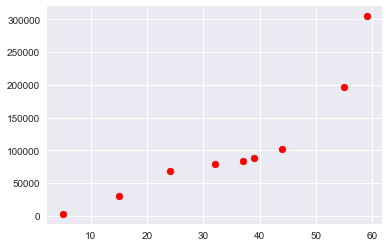

In [155]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15)
plt.scatter(X_test_confirmed, y_test_confirmed,  color='red')
#plt.xticks(())
#plt.yticks(())
#plt.show()

In [157]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)




linear_pred = linear_model.predict(future_forcast)
print('Mean Absolute Error:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('Mean Squared Error:',mean_squared_error(test_linear_pred, y_test_confirmed))

Mean Absolute Error: 27881.839407894095
Mean Squared Error: 2070955318.0373294


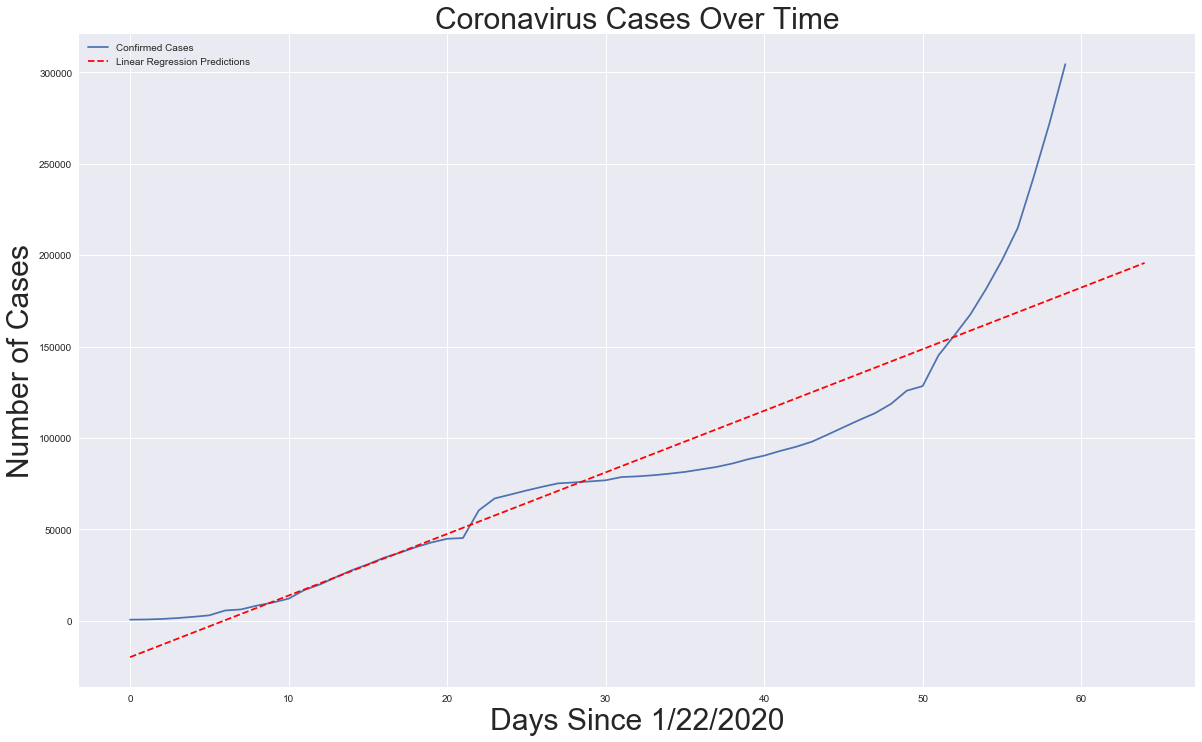

In [158]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='red')
plt.title('Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks()
plt.show()

In [159]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_pred

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 41983.5246989 ,  41983.52501289,  41983.53474663,  41983.60099889,
        41983.84622644,  41984.50592309,  41985.96629869,  41988.80195812,
        41993.81358032,  42002.06559731,  42014.92387316,  42034.09338304,
        42061.6558922 ,  42100.107635  ,  42152.3969939 ,  42221.96217847,
        42312.76890444,  42429.34807264,  42576.83344807,  42760.99933887,
        42988.29827537,  43265.89868903,  43601.72259154,  44004.48325374,
        44483.7228847 ,  45049.85031068,  45714.17865418,  46488.9630129 ,
        47387.43813881,  48423.8561171 ,  49613.52404521,  50972.84171189,
        52519.3392761 ,  54271.71494613,  56249.87265855,  58474.95975722,
        60969.40467232,  63756.95459935,  66862.71317813,  70313.17817182,
        74136.27914593,  78361.41514732,  83019.49238323,  88142.96190026,
        93765.85726338,  99923.83223499, 106654.19845385, 113995.96311416,
       121989.86664452, 130678.42038698, 140105.94427601, 150318.60451752,
       161364.4512679 , 1

Mean Absolute Error: 20980.02526175894
Mean Squared Error: 579912856.3666468


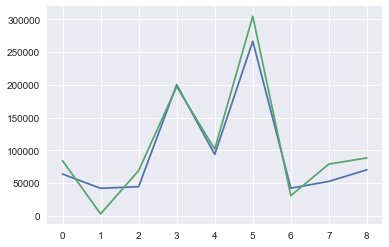

In [160]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('Mean Absolute Error:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('Mean Squared Error:',mean_squared_error(svm_test_pred, y_test_confirmed))

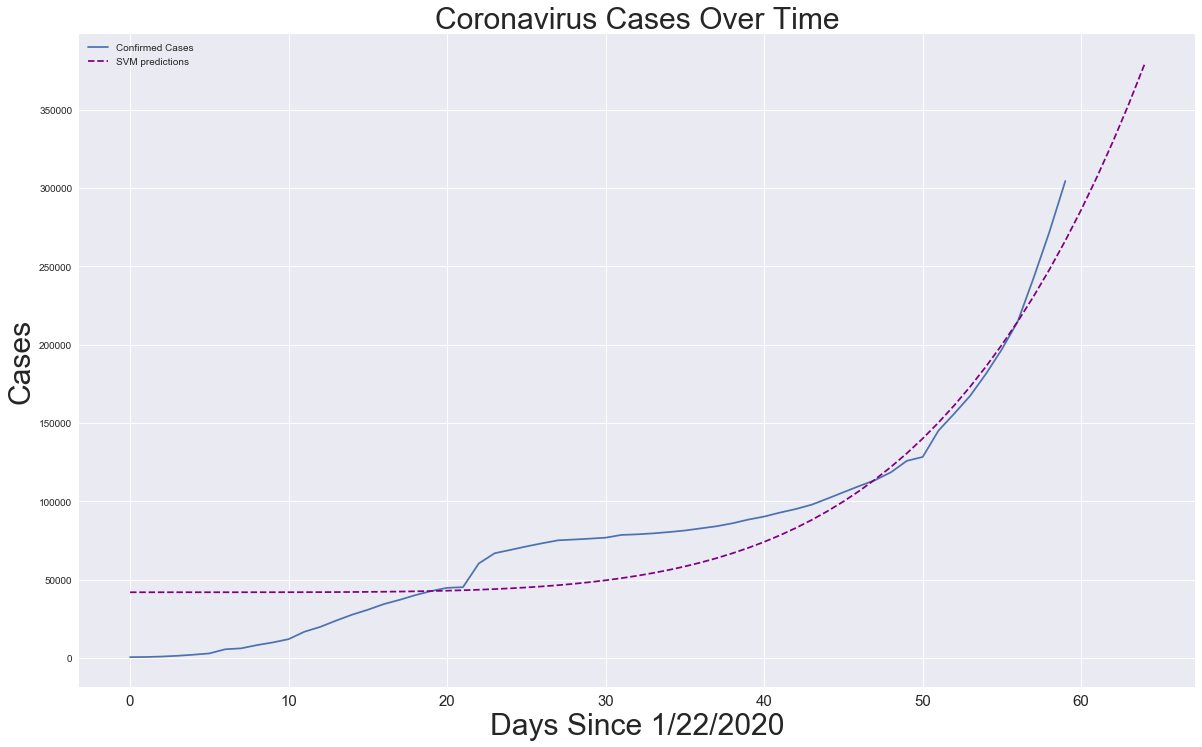

In [165]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

In [168]:
#set(zip(future_forcast_dates[-10:], linear_pred[-10:]))

In [166]:
array_1=linear_pred
array_2=[]
for i in array_1:
    for j in i:
        array_2.append(j)
#     print(i)
# b
# b=np.array(b)   
#svm_pred
set(zip(future_forcast_dates[-10:], array_2[-10:]))


{('03/22/2020', 165403.35531417507),
 ('03/23/2020', 168773.51674244495),
 ('03/24/2020', 172143.67817071476),
 ('03/25/2020', 175513.83959898457),
 ('03/26/2020', 178884.00102725445),
 ('03/27/2020', 182254.16245552426),
 ('03/28/2020', 185624.32388379413),
 ('03/29/2020', 188994.48531206395),
 ('03/30/2020', 192364.64674033376),
 ('03/31/2020', 195734.80816860363)}

In [167]:
# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('03/22/2020', 200010.6626520277),
 ('03/23/2020', 214908.7547760789),
 ('03/24/2020', 230909.86221303782),
 ('03/25/2020', 248074.13008120717),
 ('03/26/2020', 266463.85120241705),
 ('03/27/2020', 286143.50378101214),
 ('03/28/2020', 307179.7890828949),
 ('03/29/2020', 329641.6691144778),
 ('03/30/2020', 353600.4043017792),
 ('03/31/2020', 379129.59116935765)}

In [25]:
print(y_test_confirmed)
#print(test_linear_pred)


[[ 40150]
 [ 73258]
 [ 82754]
 [ 76197]
 [109795]
 [125865]
 [ 71224]
 [ 23892]
 [ 75136]]


In [26]:
print(test_linear_pred)

[[ 40413.00705842]
 [ 69518.29199867]
 [105899.89817398]
 [ 80432.77385126]
 [142281.50434928]
 [153195.98620187]
 [ 65880.13138114]
 [ 22222.20397077]
 [ 73156.4526162 ]]


In [27]:
print(y_test_confirmed)

[[ 40150]
 [ 73258]
 [ 82754]
 [ 76197]
 [109795]
 [125865]
 [ 71224]
 [ 23892]
 [ 75136]]


In [28]:
from sklearn.metrics import r2_score
print('Variance score: %.2f'%r2_score(y_test_confirmed, test_linear_pred))

Variance score: 0.69


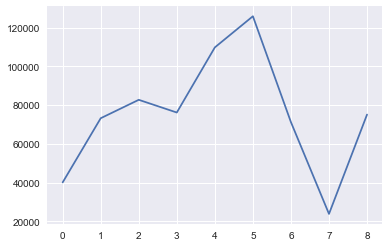

In [29]:
plt.plot(y_test_confirmed)


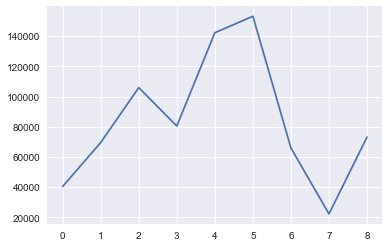

In [30]:
plt.plot(test_linear_pred)

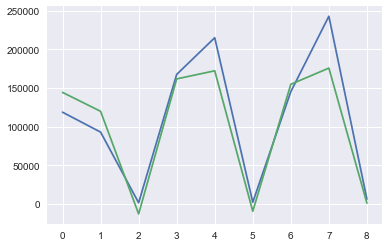

In [109]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

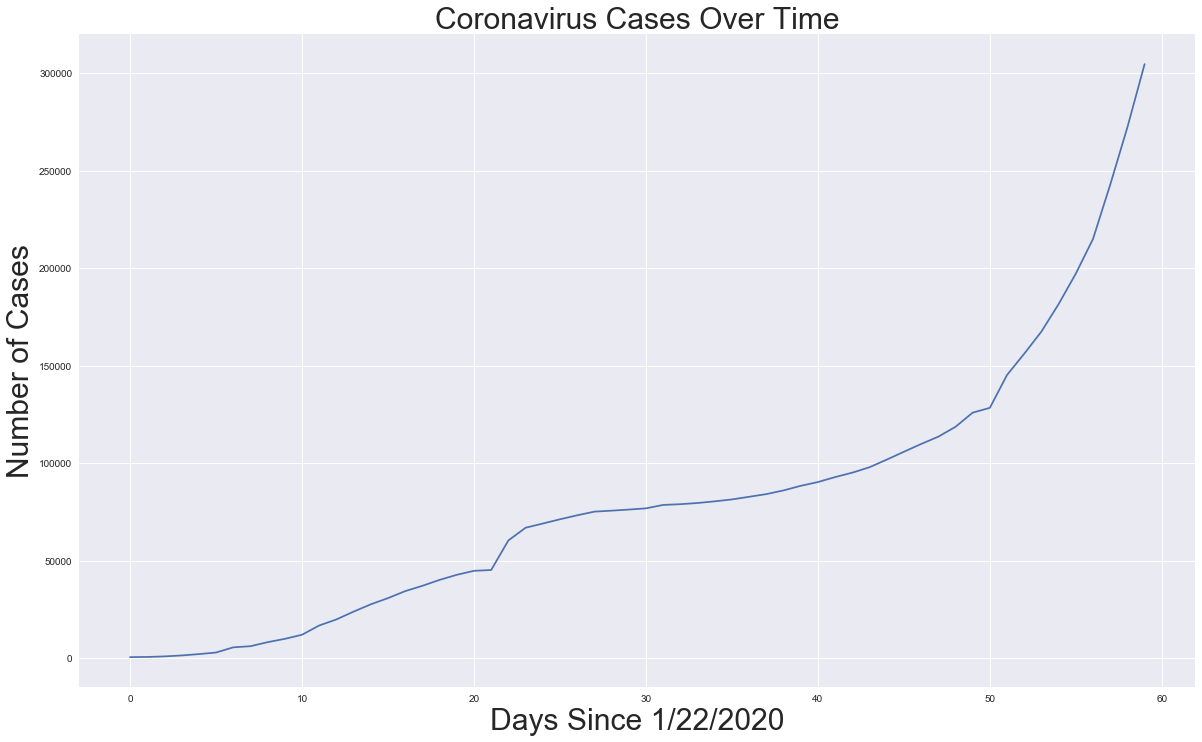

In [108]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks()
plt.show()

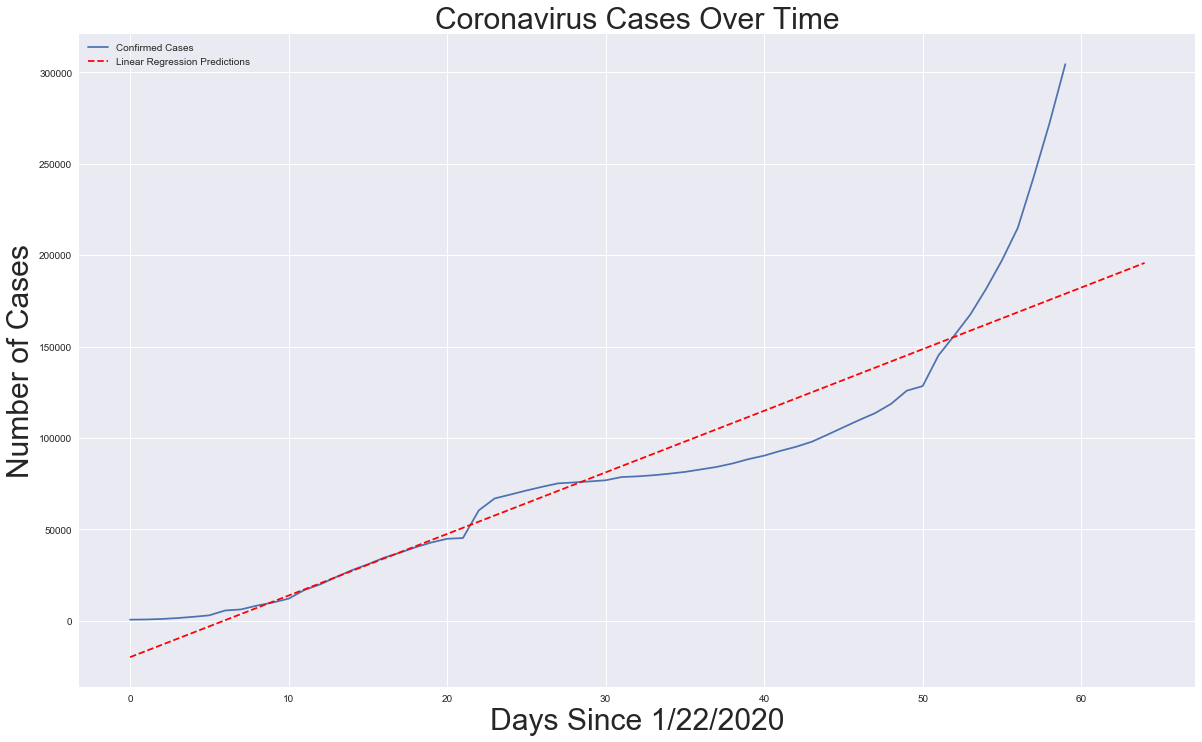

In [162]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forcast, linear_pred, linestyle='dashed', color='red')
# plt.title('Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
# plt.xticks()
# plt.show()

In [86]:
print('Linear regression future predictions:')
print(linear_pred[-5:])
#set(zip(future_forcast_dates[-10:], linear_pred[-10:]))

Linear regression future predictions:
[[186125.0168146 ]
 [189617.8123783 ]
 [193110.60794199]
 [196603.40350568]
 [200096.19906937]]


In [105]:
# print('Ridge regression future predictions:')
# set(zip(future_forcast_dates[-5:], linear_pred[-5:]))

ValueError: x and y must have same first dimension, but have shapes (70, 1) and (65,)

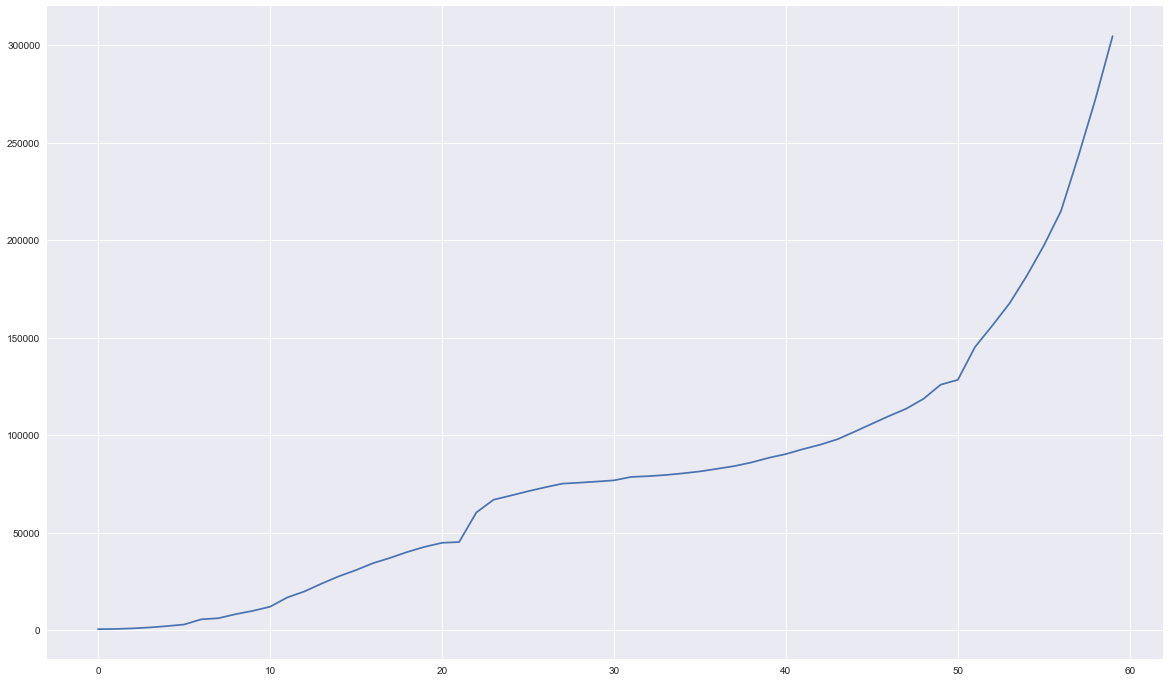

In [106]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='blue')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

##SHOWING THE CASES RECOVERED AND DEATH 

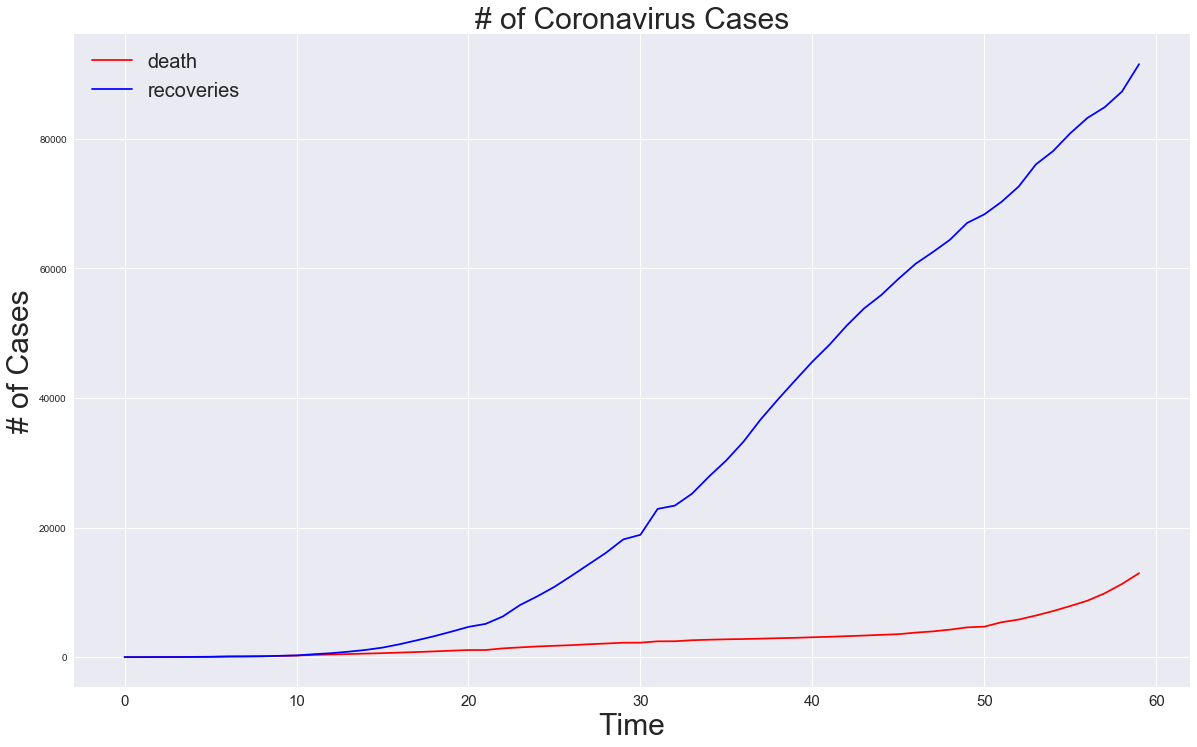

In [36]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='blue')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

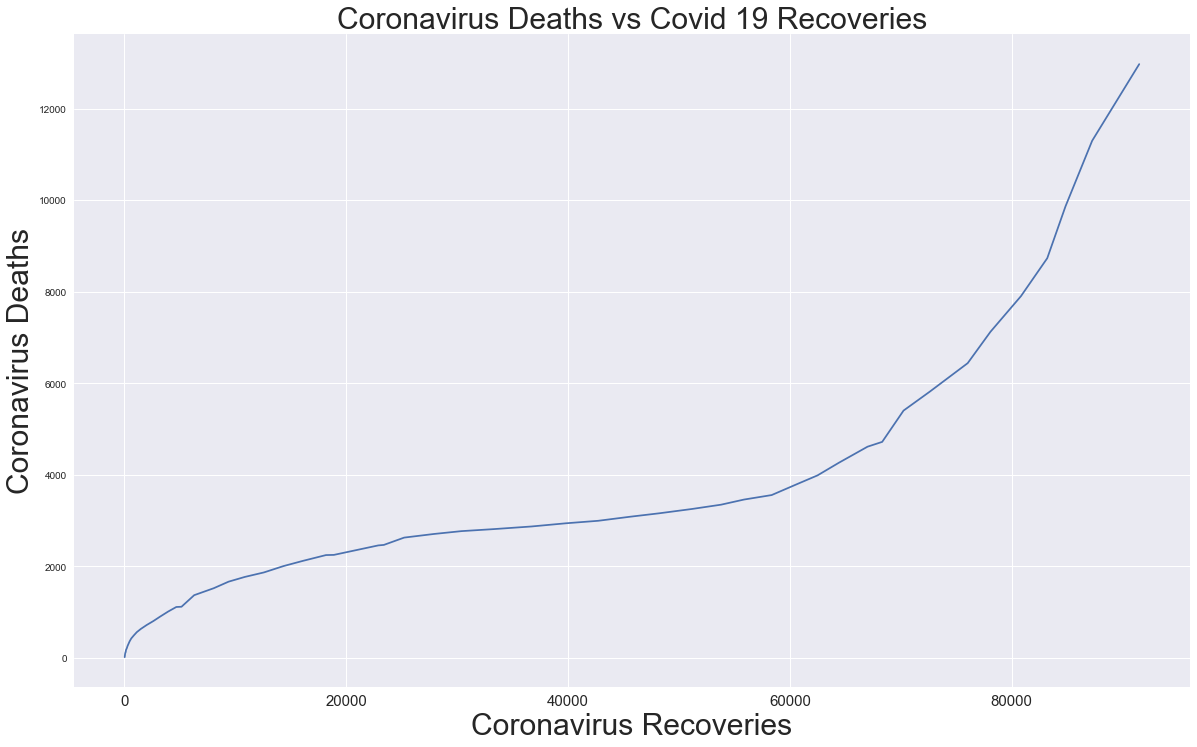

In [37]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Covid 19 Recoveries', size=30)
plt.xlabel('Coronavirus Recoveries', size=30)
plt.ylabel('Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [38]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]
print(latest_confirmed)
print("BREAK")
print(latest_deaths)
print("BREAK")
print(latest_recoveries)

0       411
1      1007
2       432
3         1
4      1183
       ... 
477       1
478       1
479       1
480       1
481       1
Name: 3/21/20, Length: 482, dtype: int64
BREAK
0       1
1      35
2       2
3       0
4       4
       ..
477     0
478     0
479     0
480     0
481     0
Name: 3/21/20, Length: 482, dtype: int64
BREAK
0       42
1      232
2      140
3        1
4      114
      ... 
477      0
478      0
479      0
480      0
481      0
Name: 3/21/20, Length: 482, dtype: int64


In [39]:
confirmed_df[dates[-1]]

0       411
1      1007
2       432
3         1
4      1183
       ... 
477       1
478       1
479       1
480       1
481       1
Name: 3/21/20, Length: 482, dtype: int64

In [40]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [41]:
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',
 'Serbia',
 'Sl

In [42]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [43]:
country_confirmed_cases

[81305,
 53578,
 25489,
 25374,
 22213,
 20610,
 14431,
 8799,
 6575,
 5067,
 3640,
 2815,
 2814,
 2118,
 1763,
 1420,
 1280,
 1278,
 1183,
 1071,
 1021,
 1007,
 995,
 883,
 785,
 730,
 712,
 670,
 670,
 537,
 536,
 530,
 523,
 506,
 481,
 473,
 450,
 432,
 411,
 392,
 383,
 367,
 330,
 318,
 307,
 306,
 306,
 305,
 294,
 240,
 214,
 206,
 203,
 200,
 196,
 187,
 178,
 176,
 171,
 163,
 160,
 158,
 153,
 153,
 144,
 139,
 124,
 117,
 112,
 110,
 103,
 96,
 94,
 93,
 88,
 85,
 85,
 84,
 83,
 83,
 80,
 77,
 76,
 76,
 73,
 70,
 64,
 60,
 53,
 53,
 53,
 52,
 52,
 49,
 49,
 47,
 47,
 43,
 37,
 32,
 27,
 25,
 24,
 24,
 23,
 22,
 21,
 19,
 19,
 18,
 17,
 17,
 16,
 16,
 14,
 14,
 14,
 14,
 13,
 11,
 10,
 9,
 7,
 7,
 7,
 6,
 6,
 6,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [44]:
unique_countries

['China',
 'Italy',
 'US',
 'Spain',
 'Germany',
 'Iran',
 'France',
 'Korea, South',
 'Switzerland',
 'United Kingdom',
 'Netherlands',
 'Belgium',
 'Austria',
 'Norway',
 'Sweden',
 'Denmark',
 'Portugal',
 'Canada',
 'Malaysia',
 'Australia',
 'Brazil',
 'Japan',
 'Czechia',
 'Israel',
 'Ireland',
 'Pakistan',
 'Cruise Ship',
 'Luxembourg',
 'Turkey',
 'Chile',
 'Poland',
 'Greece',
 'Finland',
 'Ecuador',
 'Qatar',
 'Iceland',
 'Indonesia',
 'Singapore',
 'Thailand',
 'Saudi Arabia',
 'Slovenia',
 'Romania',
 'India',
 'Peru',
 'Philippines',
 'Estonia',
 'Russia',
 'Bahrain',
 'Egypt',
 'South Africa',
 'Iraq',
 'Croatia',
 'Mexico',
 'Panama',
 'Colombia',
 'Lebanon',
 'Slovakia',
 'Kuwait',
 'Serbia',
 'Bulgaria',
 'Armenia',
 'Argentina',
 'United Arab Emirates',
 'Taiwan*',
 'San Marino',
 'Algeria',
 'Latvia',
 'Costa Rica',
 'Dominican Republic',
 'Uruguay',
 'Hungary',
 'Morocco',
 'Vietnam',
 'Bosnia and Herzegovina',
 'Andorra',
 'North Macedonia',
 'Jordan',
 'Cyprus',
 

In [45]:
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81305 cases
Italy: 53578 cases
US: 25489 cases
Spain: 25374 cases
Germany: 22213 cases
Iran: 20610 cases
France: 14431 cases
Korea, South: 8799 cases
Switzerland: 6575 cases
United Kingdom: 5067 cases
Netherlands: 3640 cases
Belgium: 2815 cases
Austria: 2814 cases
Norway: 2118 cases
Sweden: 1763 cases
Denmark: 1420 cases
Portugal: 1280 cases
Canada: 1278 cases
Malaysia: 1183 cases
Australia: 1071 cases
Brazil: 1021 cases
Japan: 1007 cases
Czechia: 995 cases
Israel: 883 cases
Ireland: 785 cases
Pakistan: 730 cases
Cruise Ship: 712 cases
Luxembourg: 670 cases
Turkey: 670 cases
Chile: 537 cases
Poland: 536 cases
Greece: 530 cases
Finland: 523 cases
Ecuador: 506 cases
Qatar: 481 cases
Iceland: 473 cases
Indonesia: 450 cases
Singapore: 432 cases
Thailand: 411 cases
Saudi Arabia: 392 cases
Slovenia: 383 cases
Romania: 367 cases
India: 330 cases
Peru: 318 cases
Philippines: 307 cases
Estonia: 306 cases
Russia: 306 cases
Bahrain: 305 cases
Egypt: 29

In [46]:
unique_provinces =  list(confirmed_df['Province/State'].unique())
# those are countries, which are not provinces/states.
unique_provinces

[nan,
 'British Columbia',
 'New South Wales',
 'Victoria',
 'Queensland',
 'South Australia',
 'From Diamond Princess',
 'Western Australia',
 'Tasmania',
 'Northern Territory',
 'Ontario',
 'Alberta',
 'Quebec',
 'Washington',
 'New York',
 'California',
 'Massachusetts',
 'Diamond Princess',
 'Grand Princess',
 'Georgia',
 'Colorado',
 'Florida',
 'New Jersey',
 'Oregon',
 'Texas',
 'Illinois',
 'Pennsylvania',
 'Iowa',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Tennessee',
 'Virginia',
 'Arizona',
 'Indiana',
 'Kentucky',
 'District of Columbia',
 'Nevada',
 'New Hampshire',
 'Minnesota',
 'Nebraska',
 'Ohio',
 'Rhode Island',
 'Wisconsin',
 'Connecticut',
 'Hawaii',
 'Oklahoma',
 'Utah',
 'Kansas',
 'Louisiana',
 'Missouri',
 'Vermont',
 'Alaska',
 'Arkansas',
 'Delaware',
 'Idaho',
 'Maine',
 'Michigan',
 'Mississippi',
 'Montana',
 'New Mexico',
 'North Dakota',
 'South Dakota',
 'West Virginia',
 'Wyoming',
 'Hubei',
 'France',
 'Guangdong',
 'Henan',
 'Zhejiang',
 'H

In [47]:
#removing uk denmark and france 
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

In [48]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_confirmed[confirmed_df['Province/State']==unique_provinces[i]].sum()

In [49]:
unique_provinces

['Hubei',
 'New York',
 'Netherlands',
 'Washington',
 'Guangdong',
 'California',
 'New Jersey',
 'Henan',
 'Zhejiang',
 'Hunan',
 'Anhui',
 'Jiangxi',
 'Michigan',
 'Shandong',
 'Diamond Princess',
 'Illinois',
 'Florida',
 'Jiangsu',
 'Louisiana',
 'Texas',
 'Chongqing',
 'Sichuan',
 'Massachusetts',
 'Georgia',
 'Beijing',
 'Heilongjiang',
 'New South Wales',
 'British Columbia',
 'Pennsylvania',
 'Colorado',
 'Shanghai',
 'Ontario',
 'Tennessee',
 'Hebei',
 'Fujian',
 'Wisconsin',
 'Hong Kong',
 'Guangxi',
 'North Carolina',
 'Ohio',
 'Shaanxi',
 'Victoria',
 'Queensland',
 'Alberta',
 'Connecticut',
 'Maryland',
 'Quebec',
 'Yunnan',
 'South Carolina',
 'Hainan',
 'Nevada',
 'Virginia',
 'Guizhou',
 'Mississippi',
 'Minnesota',
 'Tianjin',
 'Utah',
 'Gansu',
 'Shanxi',
 'Alabama',
 'Indiana',
 'Liaoning',
 'Arkansas',
 'Arizona',
 'Oregon',
 'Jilin',
 'Faroe Islands',
 'Western Australia',
 'Kentucky',
 'District of Columbia',
 'Xinjiang',
 'Inner Mongolia',
 'Ningxia',
 'Missour

In [50]:
province_confirmed_cases

[67800,
 11710,
 3631,
 1793,
 1400,
 1364,
 1327,
 1273,
 1236,
 1018,
 990,
 935,
 788,
 764,
 761,
 753,
 659,
 631,
 585,
 581,
 576,
 542,
 525,
 507,
 504,
 484,
 436,
 424,
 396,
 390,
 380,
 377,
 371,
 318,
 303,
 282,
 273,
 254,
 253,
 248,
 248,
 229,
 221,
 195,
 194,
 193,
 181,
 176,
 171,
 168,
 161,
 156,
 146,
 140,
 138,
 137,
 136,
 134,
 133,
 131,
 128,
 126,
 122,
 118,
 114,
 93,
 92,
 90,
 87,
 77,
 76,
 75,
 75,
 74,
 70,
 68,
 67,
 66,
 57,
 55,
 53,
 53,
 45,
 45,
 43,
 38,
 37,
 36,
 33,
 32,
 29,
 28,
 26,
 23,
 21,
 21,
 21,
 18,
 18,
 18,
 18,
 17,
 16,
 15,
 15,
 15,
 14,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1]

In [51]:
# number of cases per province/state/city
print('Confirmed Cases by Province/States (US, China, Australia, Canada):')
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Confirmed Cases by Province/States (US, China, Australia, Canada):
Hubei: 67800 cases
New York: 11710 cases
Netherlands: 3631 cases
Washington: 1793 cases
Guangdong: 1400 cases
California: 1364 cases
New Jersey: 1327 cases
Henan: 1273 cases
Zhejiang: 1236 cases
Hunan: 1018 cases
Anhui: 990 cases
Jiangxi: 935 cases
Michigan: 788 cases
Shandong: 764 cases
Diamond Princess: 761 cases
Illinois: 753 cases
Florida: 659 cases
Jiangsu: 631 cases
Louisiana: 585 cases
Texas: 581 cases
Chongqing: 576 cases
Sichuan: 542 cases
Massachusetts: 525 cases
Georgia: 507 cases
Beijing: 504 cases
Heilongjiang: 484 cases
New South Wales: 436 cases
British Columbia: 424 cases
Pennsylvania: 396 cases
Colorado: 390 cases
Shanghai: 380 cases
Ontario: 377 cases
Tennessee: 371 cases
Hebei: 318 cases
Fujian: 303 cases
Wisconsin: 282 cases
Hong Kong: 273 cases
Guangxi: 254 cases
North Carolina: 253 cases
Ohio: 248 cases
Shaanxi: 248 cases
Victoria: 229 cases
Queensland: 221 cases
Alberta: 195 cases
Connecticut: 194

In [52]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

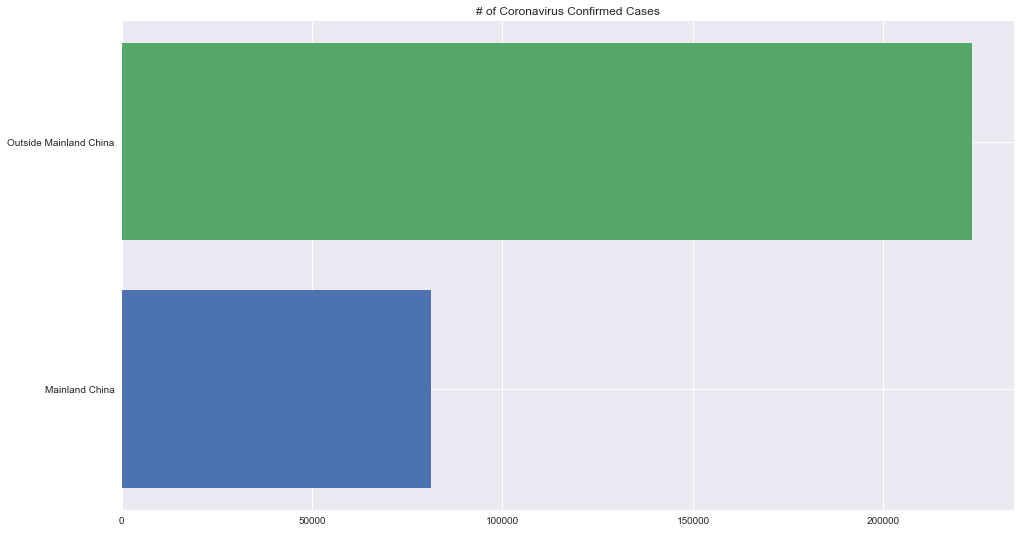

In [53]:


china_confirmed = latest_confirmed[confirmed_df['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases')
plt.show()



In [54]:


print('Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))



Outside Mainland China 223219 cases:
Mainland China: 81305 cases
Total: 304524 cases


In [55]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [56]:
visual_unique_countries

['China',
 'Italy',
 'US',
 'Spain',
 'Germany',
 'Iran',
 'France',
 'Korea, South',
 'Switzerland',
 'United Kingdom',
 'Others']

In [57]:
visual_confirmed_cases

[81305, 53578, 25489, 25374, 22213, 20610, 14431, 8799, 6575, 5067, 41083]

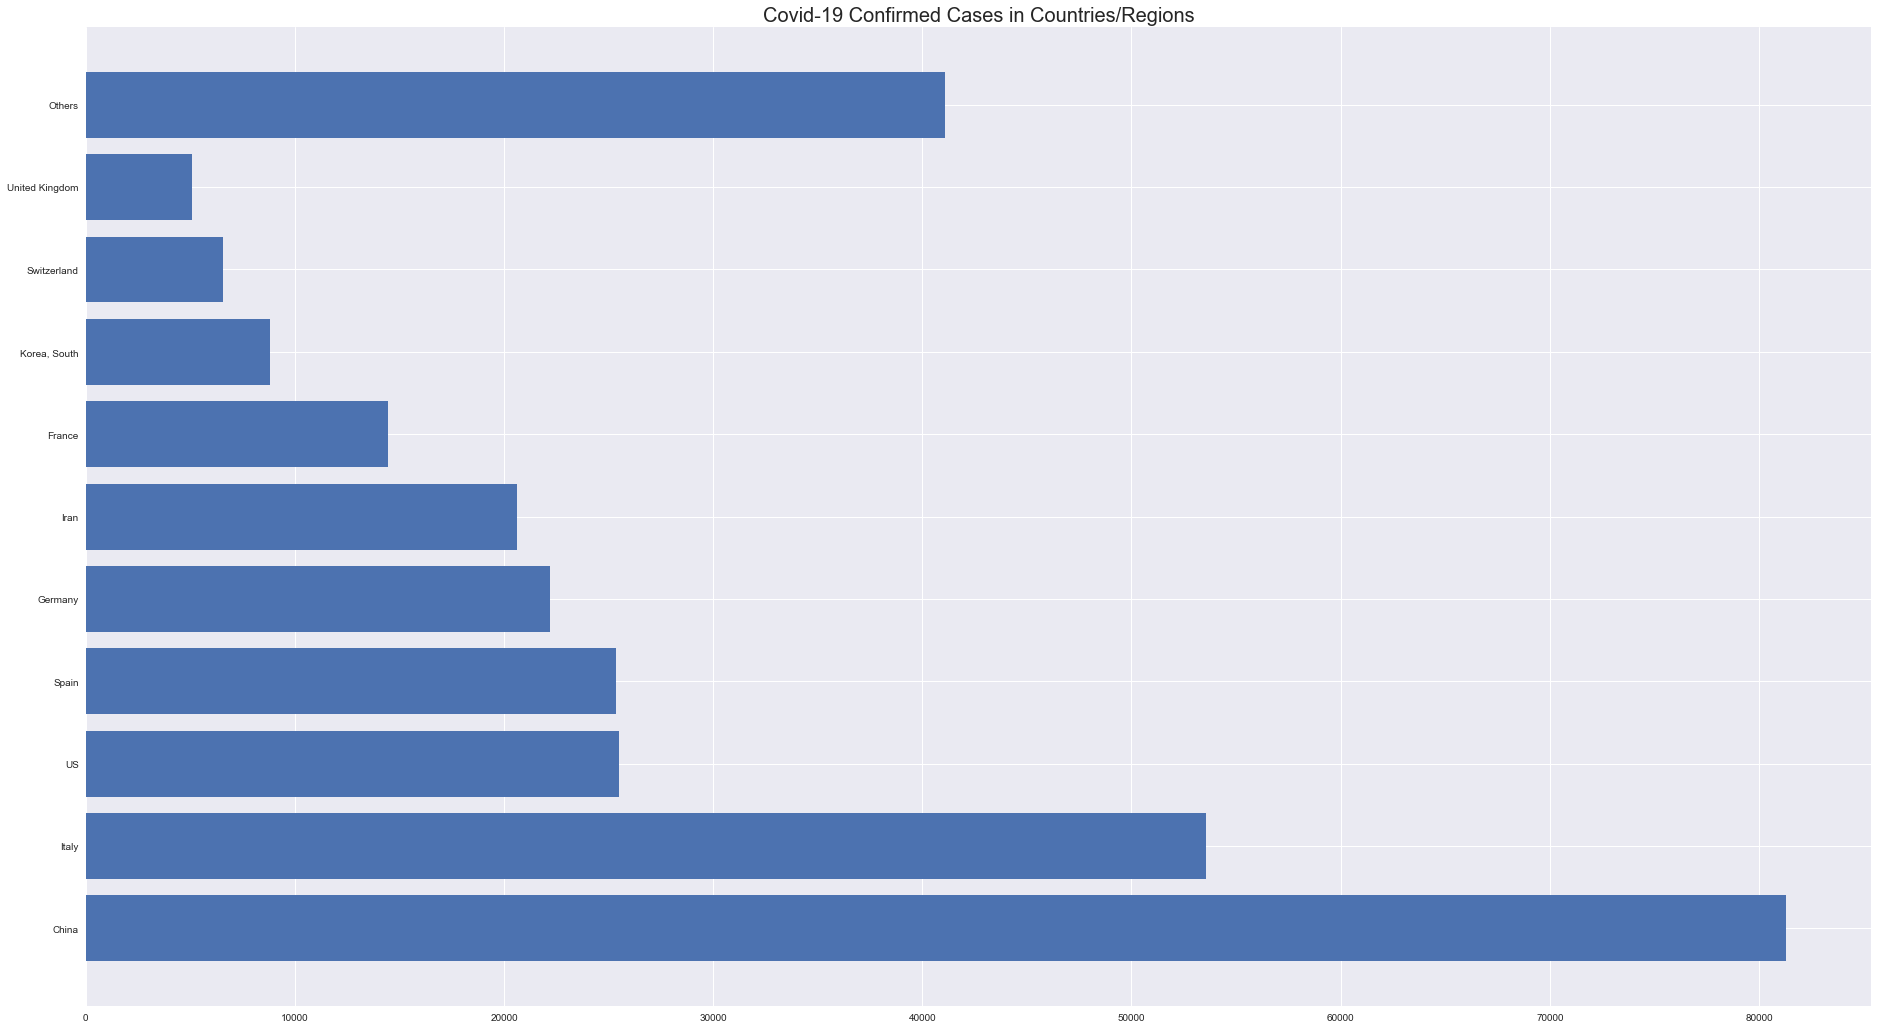

In [58]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

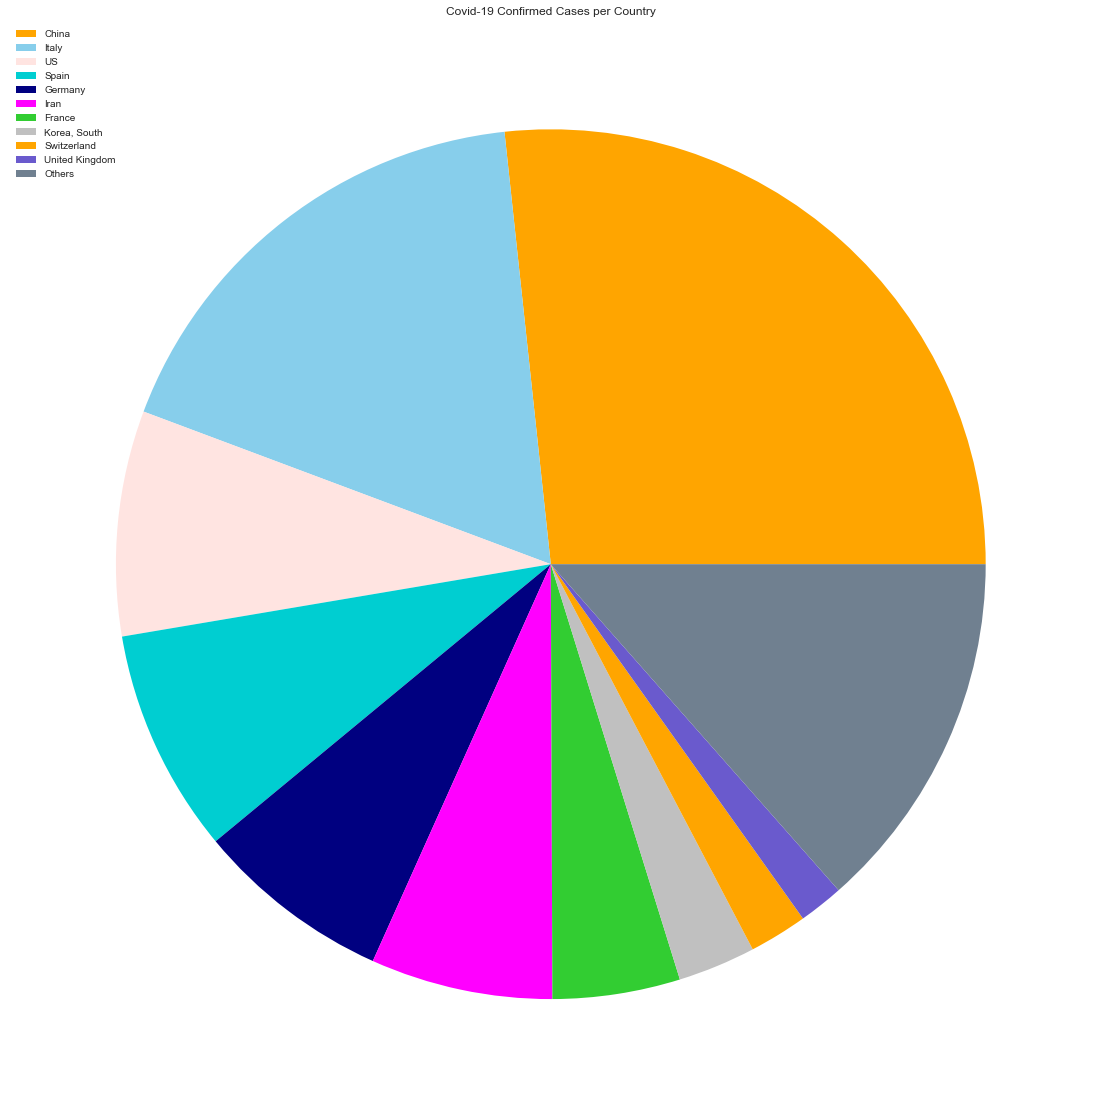

In [59]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()